<a href="https://www.kaggle.com/code/ghazalkz/part-2?scriptVersionId=101075924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dask import bag, diagnostics 
import pandas as pd
import seaborn as sns
from skimage import io

In [2]:

masks=[]
real = []
files = []
for dirname, _, filenames in os.walk('/kaggle/input/nuclei-spot-mask/10_nuclei_images'):


    for filename in filenames:
        if dirname.endswith('masks'):
            masks.append(os.path.join(dirname, filename))
        elif dirname.endswith('images'):
            real.append(os.path.join(dirname, filename))
            
#               masks.append(filename)
    # file = list(filter(lambda x : len(x) >= 64, _))
    # [i for i in _ if len(i) >= 64]
    for i in _:
        if len(i)>=64:
            files.append(i)
            
print(len(files))
print(len(masks))
print(masks[0])
print(files[0])
print("real",real[0])

#../input/nuclei-spot-mask/10_nuclei_images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9
#/masks/0adbf56cd182f784ca681396edc8b847b888b34762d48168c7812c79d145aa07.png

10
358
/kaggle/input/nuclei-spot-mask/10_nuclei_images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/masks/0adbf56cd182f784ca681396edc8b847b888b34762d48168c7812c79d145aa07.png
0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9
real /kaggle/input/nuclei-spot-mask/10_nuclei_images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png


In [3]:
df = pd.DataFrame(masks,columns=["path"])
df.head()       

,path
0,/kaggle/input/nuclei-spot-mask/10_nuclei_image...
1,/kaggle/input/nuclei-spot-mask/10_nuclei_image...
2,/kaggle/input/nuclei-spot-mask/10_nuclei_image...
3,/kaggle/input/nuclei-spot-mask/10_nuclei_image...
4,/kaggle/input/nuclei-spot-mask/10_nuclei_image...


In [4]:
split = df["path"].str.split("/",expand=True).drop([0,1,2,3,4,6,7], axis=1)
df["folder"] = split
df.head(5)

,path,folder
0,/kaggle/input/nuclei-spot-mask/10_nuclei_image...,0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e...
1,/kaggle/input/nuclei-spot-mask/10_nuclei_image...,0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e...
2,/kaggle/input/nuclei-spot-mask/10_nuclei_image...,0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e...
3,/kaggle/input/nuclei-spot-mask/10_nuclei_image...,0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e...
4,/kaggle/input/nuclei-spot-mask/10_nuclei_image...,0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e...


In [6]:
data = {k: list(v) for k,v in df.groupby("folder")["path"]}

#   data["00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e"]

In [ ]:
data["00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e"]

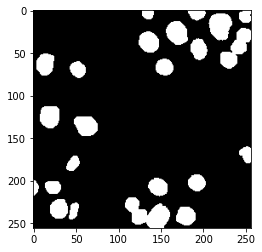

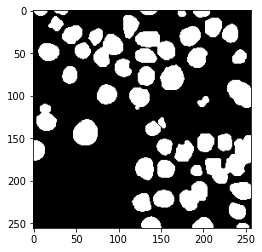

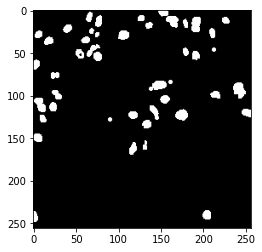

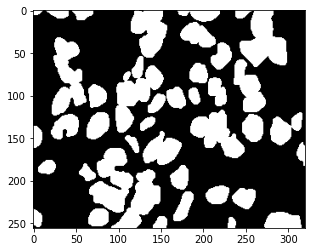

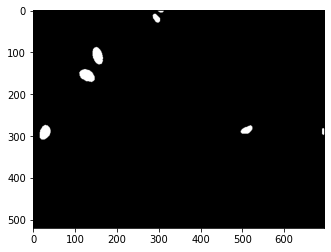

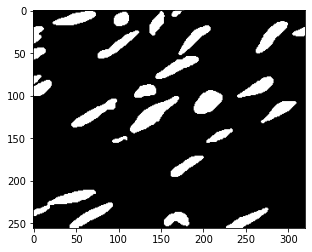

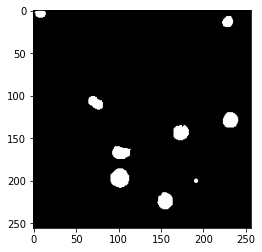

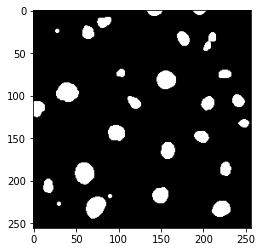

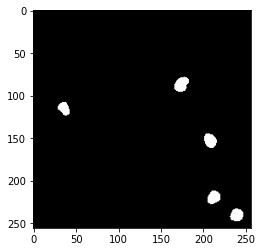

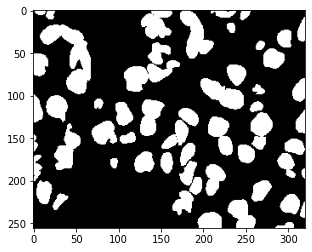

In [8]:
for k in files:
    l = len(data[k])
#     print(l)
    mask = Image.open(data[k][0])
#     print(mask)
    for i in range(l):
        img=Image.open(data[k][i])
        mask.paste(img , (0,0), mask = img)
    plt.imshow(mask.convert("RGBA"))
    plt.show()
    


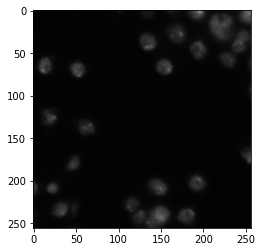

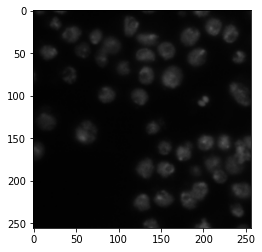

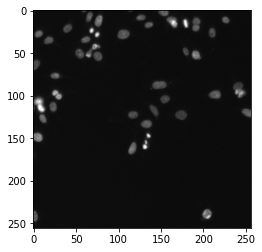

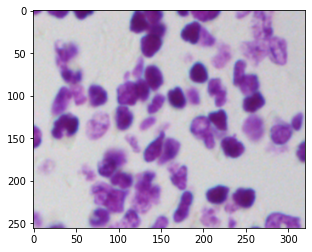

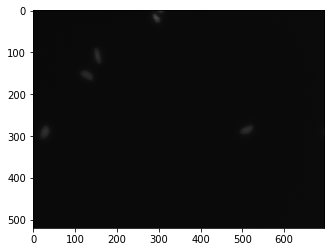

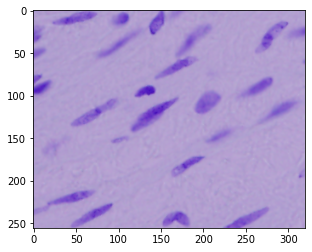

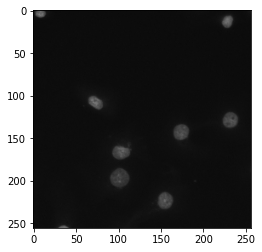

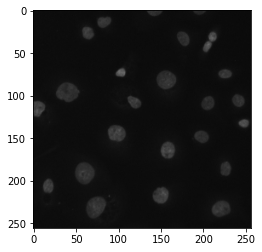

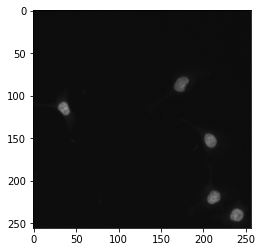

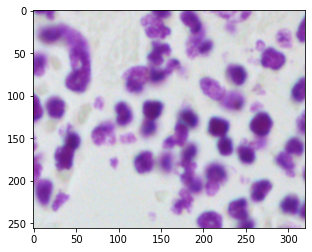

In [9]:
for i in real:
    for j in range(len(real)):
        img=Image.open(i)
    plt.imshow(img.convert("RGBA"))
    plt.show()

In [ ]:
# get image dimensions


# df.count()

# need to revise




def get_dims(file):
    dims = []
    for i in range(len(file)):
        h,w = file[i].shape[:2]
        dims.append((h,w))
    return dims

# dims = get_dims(img)
# print(dims[0:10])

In [ ]:
dim_df = pd.DataFrame(dims, columns=['height', 'width'])
# dim_df.head()

In [ ]:
sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
# print(sizes)

In [ ]:
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( sizes['height'] , color="dodgerblue", label="height")
sns.distplot( sizes['width'] , color="orange", label="width")
sns.distplot( sizes["count"] , color="deeppink", label="count")

# plt.title('Nuclei Histogram')
# plt.legend();

In [ ]:
# sns.boxplot(data=sizes, orient="v", palette="Set3")